<a href="https://colab.research.google.com/github/varu04/varu04/blob/main/MacroAssign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Varun Nair, MA Economics Azim Premji University

**Course**: Advanced Macroeconomic Theory

This is a term paper work where we understand the stability of the system of functional finance policy framework as mentioned in Mason & Jayadev (2018) and after understanding Pasinetti., L (1988). We make use of mathematical concept of a Jacobian for stability check and to see whether the curve exhibits ocillatory behaviour or not. Additionaly, we visually understand the concepts of timepath using isoclines in the Primary Bal and Interest Rate space.

Suppose, the government of a country chooses to adhere to functional finance policy framework as described in
Mason and Jayadev (2018). The two dynamic equations for interest rate (i) and primary balance (b) would be given as
the following (see equations 12 and 13 of the paper).

𝑑𝑖
𝑑𝑡 = 𝑎(𝑔 +𝑏𝑑− 𝑖)
𝑏̇ = 𝛽((𝑧 − 𝑛𝑖 + 𝜏𝜎𝑖)/𝛾− 𝑏)

i. Use appropriate Python codes for matplotlib to plot the 2 isoclines in interest rate-primary balance space
ii. Show the time path of these variables by using specific numeric values in scipy library. Choose appropriate
numeric values to show 2 cases- (i) when the system is stable and (ii) when the system is unstable

Q.2 Part A

<ipython-input-6-c82a10374542>:30: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(I, B, di_dt, levels=[0], colors='mediumspringgreen', linestyles='dashed', label='di/dt = 0')
<ipython-input-6-c82a10374542>:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(I, B, db_dt, levels=[0], colors='red', linestyles='dashed', label='db/dt = 0')


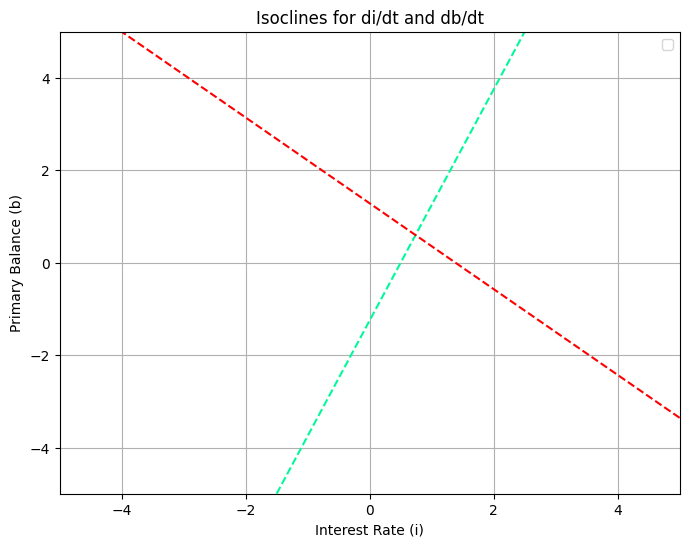

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
a = 0.6
g=0.5
d = 2.5
beta = 1.2
z = 0.9
n = 0.4
tau = 0.5
sigma = 0.5
gamma = 0.7

# Define the range of interest rate (i) and primary balance (b)
i_values = np.linspace(-5, 5, 100)
b_values = np.linspace(-5, 5, 100)

# Create a grid of i and b values
I, B = np.meshgrid(i_values, b_values)

# Calculate di/dt and db/dt using the given equations
di_dt = a * (g + (B / d) - I)
db_dt = beta * (((z-n * I-tau * sigma * I)/gamma)- B)

                #beta * (((z-n * I-tau * sigma * I)/Gamma)- B)

# Plot the isoclines
plt.figure(figsize=(8, 6))
plt.contour(I, B, di_dt, levels=[0], colors='mediumspringgreen', linestyles='dashed', label='di/dt = 0')
plt.contour(I, B, db_dt, levels=[0], colors='red', linestyles='dashed', label='db/dt = 0')
plt.xlabel('Interest Rate (i)')
plt.ylabel('Primary Balance (b)')
plt.title('Isoclines for di/dt and db/dt')
plt.legend()
plt.grid(True)
plt.show()


Q.2 Part B

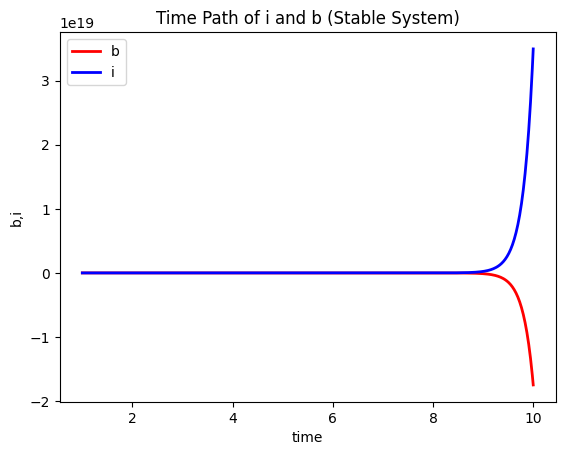

-7
15.0
49
60.0


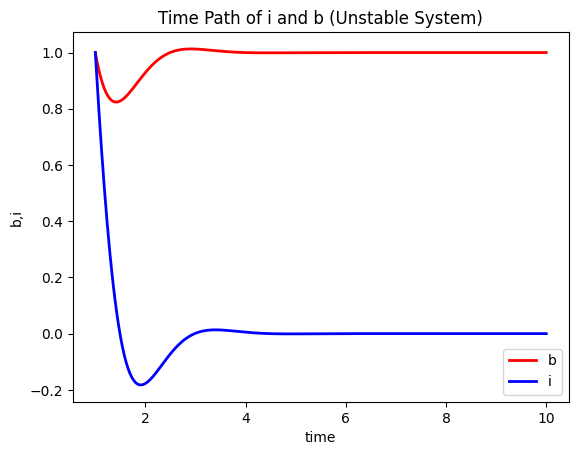

5
-12.0
25
-48.0


In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spint ### to work with multiple integrals.
%matplotlib inline

# The differential equation system

""" Stable if tr<0 and det>0 """
""" No Oscillation if tr^2>4det. Oscilation if tr^2<4det. """

#Function that returns dydt
def f(v,t,a,g,d,Beta,z,n,Tao,Sigma,Gamma):                      #defines a function that depends on v,t, and rest are parameters
# z is a vector; a,g,d,Beta,z,n,Tao,Sigma,Gamma are parameters; and t is time

    #v[0]=i, v[1]=b                  #defn of v[0],v[1] depend on the sequence of the items defined in dzdt
    didt = a*(g+(v[1]/d)-v[0])
    #dxdt is the xdot equation

    dbdt= Beta * (((z-n*v[0]+Tao*Sigma*v[0])/Gamma)-v[1])


    dvdt=[dbdt,didt]                #dvdt is a list comprising dbdt as the 1st element, didt as the second element
    return dvdt

#Initial values
v0=[1,1]                  # Set the value of a variable y0, which will be subsequently used as the initial value of i
#Time range
t=np.linspace(1,10,500)


####                    Scenario 1 : When it is stable


a=2
g=1
d=0.5
Beta=5
z=0.5
n=4
Tao=3
Sigma=1
Gamma=1

z1=spint.odeint(f,v0,t,args=(a,g,d,Beta,z,n,Tao,Sigma,Gamma)) # command for integration, which returns an array called z1

#Plot x,y and t
plt.plot(t,z1[:,0],'r-',linewidth=2, label='b')      #plots t in x-axis, x in y-axis.
#plt.plot plots the time first and then the other stuff.
plt.plot(t,z1[:,1],'b-',linewidth=2, label='i')      #plots t in x-axis, y in y-axis.
plt.xlabel("time")
plt.ylabel("b,i")
plt.title("Time Path of i and b (Stable System)")
plt.legend()
plt.show()

trace1 = -a-Beta
print(trace1) ## output is -7

det1 = (a*Beta) * (1+((n-Tao*Sigma)/Gamma*d))
print(det1) ## output is 15
#the Det is >0 and Trace<0, thus this is a stable system.



#checking Cyclical time path
print(trace1**2)
print(4*det1) # trace^2 is less than 4*det, thus cyclical tendencies observed



##############                        Scenario 2: When it is unstable

a=-6
g=1
d=2
Beta=1
z=0.5
n=1
Tao=0.5
Sigma=1
Gamma=1

z1=spint.odeint(f,v0,t,args=(a,g,d,Beta,z,n,Tao,Sigma,Gamma)) # command for integration, which returns an array called z1

#Plot x,y and t
plt.plot(t,z1[:,0],'r-',linewidth=2, label='b')      #plots t in x-axis, x in y-axis.
#plt.plot plots the time first and then the other stuff.
plt.plot(t,z1[:,1],'b-',linewidth=2, label='i')      #plots t in x-axis, y in y-axis.
plt.xlabel("time")
plt.ylabel("b,i")
plt.title ("Time Path of i and b (Unstable System)")
plt.legend()
plt.show()


trace2 = -a-Beta
print(trace2) ## output is -7

det2 = (a*Beta) * (1+((n-Tao*Sigma)/Gamma*d))
print(det2) ## output is 15

# the Det is <0 and trace is >0 thus this is an unstable system


#checking Cyclical time path
print(trace2**2) # output is 1
print(4*det2) #output is -96.
#no oscilliating tendencies observed.

